# **Ordinary Differential Equation Solving**

Author : Rakshit Kr. Singh : [Website](https://blog.greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

Ordinary Differential Equations (ODEs) are a cornerstone of mathematical modeling, essential for understanding dynamic systems in various scientific and engineering fields.

This tutorial aims to introduce you to ODE solving tools in DeepChem.

## What are Ordinary Differential Equations?

An ordinary differential equation (ODE) is a type of differential equation that depends on a single independent variable. In contrast to partial differential equations (PDEs), which involve multiple independent variables, ODEs focus on relationships where changes occur with respect to just one variable. The term "ordinary" distinguishes these equations from stochastic differential equations (SDEs), which incorporate random processes.

ODEs consist of unknown functions and their derivatives, establishing relationships that describe how a quantity changes over time or space. These equations are fundamental in expressing the dynamics of systems.

### General  Form of an ODE -

$$dy/dx = f(x,y)$$

Here,
$dy/dx$ is the derivative of $y$ with regards to $x$, and $f(x,y)$ is a function of $x$ and $y$.

### Why we should Care About Ordinary Differential Equations

They are essential because they model how physical quantities change over time. ODEs are used in:

- Physics: To describe the motion of particles, the evolution of wave functions, and more.

- Engineering: To design control systems, signal processing, and electrical circuits.

- Biology: To model population dynamics, the spread of diseases, and biological processes.

- Economics: To analyze growth models, market equilibrium, and financial systems.

- Control Systems and Robotics: In control systems and robotics, ODEs are fundamental in describing the dynamics of systems.

## Methods for Solving ODEs in DeepChem

DeepChem boasts a number of methods for solving ODEs. Some of them are:

- Euler's Method (1st Order Runge Kutta)
    - Single Independent Variable Higher Order ODE solver.
    - Multi Independent Variable ODE Solver.
    - Single Independent Variable ODE Solver. `solver_euler_1_1`
- Mid Point Method (2nd Order Runge Kutta)
    - Single Independent Variable ODE Solver. `solver_midpoint_1_1`


    (dy/dx) = sin x
    (d2y/dx2) + k2y = 0
    (d2y/dt2) + (d2x/dt2) = x
    (d3y/dx3) + x(dy/dx) - 4xy = 0
    (rdr/dθ) + cosθ = 5

Euler:  [7.37429767]
Midpoint:  [7.38904624]
Euler Multi:  [7.37429767]


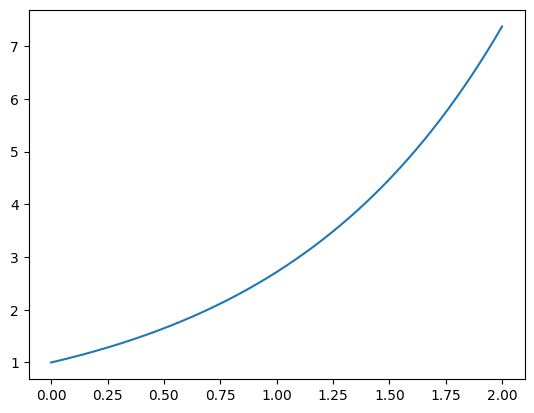

In [44]:
import numpy as np
from deepchem.utils.differentiation_utils.integrate.ode import solver_midpoint_1_1, solver_euler_1_1, solver_euler_1_n
import matplotlib.pyplot as plt

def ode(y, t, params):
    a = params[0]
    return y * a

t = np.linspace(0, 2, 1000)
y_0 = np.array([1])
a = np.array([1])

print("Euler: ", solver_euler_1_1(ode, y_0, t, a)[-1])
print("Midpoint: ", solver_midpoint_1_1(ode, y_0, t, a)[-1])
print("Euler Multi: ", solver_euler_1_n(ode, y_0, t, a)[-1])
plt.plot(t, solver_euler_1_n(ode, y_0, t, a))

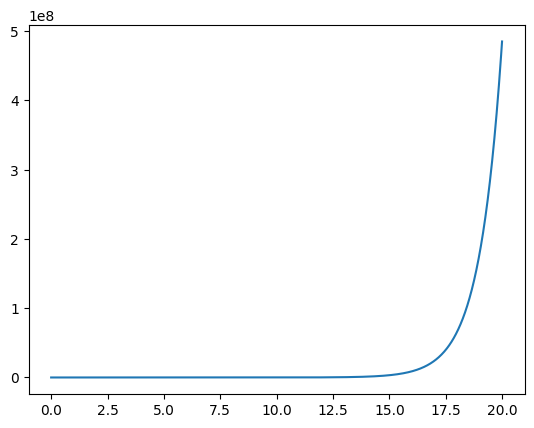

In [16]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
import matplotlib.pyplot as plt
import torch

def ode(t, y, params):
    a = params[0]
    return y * a

t = torch.linspace(0, 20, 1000)
y_0 = torch.tensor([1])
a = torch.tensor([1])

plt.plot(t, rk4_ivp(ode, t, y_0, [a]))

tensor(0.0626) tensor([10.,  1.])
tensor(0.0626) tensor([10.,  1.])
tensor(0.0626) tensor([10.,  1.])
tensor(0.0626) tensor([10.4427,  1.0397])
tensor(0.0626) tensor([10.4427,  1.0397])
tensor(0.0626) tensor([10.4427,  1.0397])
tensor(0.0626) tensor([10.8935,  1.0840])
tensor(0.0626) tensor([10.8935,  1.0840])
tensor(0.0626) tensor([10.8935,  1.0840])
tensor(0.0626) tensor([11.3505,  1.1334])
tensor(0.0626) tensor([11.3505,  1.1334])
tensor(0.0626) tensor([11.3505,  1.1334])
tensor(0.0626) tensor([11.8113,  1.1885])
tensor(0.0626) tensor([11.8113,  1.1885])
tensor(0.0626) tensor([11.8113,  1.1885])
tensor(0.0626) tensor([12.2728,  1.2498])
tensor(0.0626) tensor([12.2728,  1.2498])
tensor(0.0626) tensor([12.2728,  1.2498])
tensor(0.0626) tensor([12.7318,  1.3181])
tensor(0.0626) tensor([12.7318,  1.3181])
tensor(0.0626) tensor([12.7318,  1.3181])
tensor(0.0626) tensor([13.1840,  1.3941])
tensor(0.0626) tensor([13.1840,  1.3941])
tensor(0.0626) tensor([13.1840,  1.3941])
tensor(0.0626) t

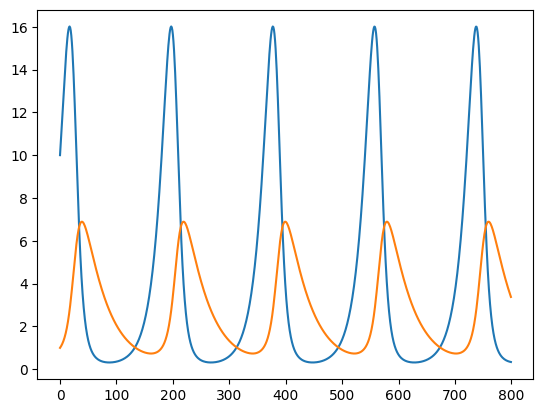

In [5]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
import matplotlib.pyplot as plt
import torch

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return torch.tensor([(a * y1 - b * y1 * y2), (c * y2 * y1 - d * y2)])

sol = rk4_ivp(fcn = lotka_volterra,
                       y0 = torch.tensor([10., 1.]),
                       t = torch.linspace(0, 50, 800),
                       params = torch.tensor([1.1, 0.4, 0.1, 0.4]))
plt.plot(sol)
plt.show()

/tmp/ipykernel_159518/3747492364.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([np.array(a * y1 - b * y1 * y2),
/tmp/ipykernel_159518/3747492364.py:9: RuntimeWarning: overflow encountered in scalar multiply
  np.array(c * y2 * y1 - d * y2)])
/tmp/ipykernel_159518/3747492364.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  np.array(c * y2 * y1 - d * y2)])


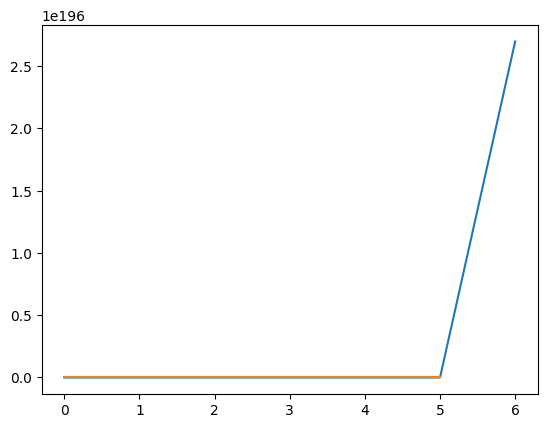

In [33]:
from deepchem.utils.differentiation_utils.integrate.ode import solver_euler_1_n, solver_midpoint_1_n
import matplotlib.pyplot as plt
import numpy as np

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return np.array([np.array(a * y1 - b * y1 * y2),
            np.array(c * y2 * y1 - d * y2)])

sol = solver_midpoint_1_n(ode = lotka_volterra,
                       y_start = np.array([10., 1.]),
                       t = np.linspace(0, 50, num=80),
                       args = np.array([1.1, 0.4, 0.1, 0.4]))
plt.plot(sol)
plt.show()

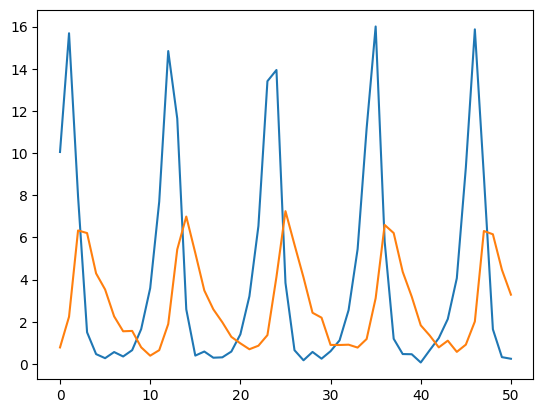

In [19]:
import pandas as pd

dataset = pd.read_csv('assets/population_data.csv')
years = torch.tensor(dataset['year'])
fish_pop = torch.tensor(dataset['fish_hundreds'])
bears_pop = torch.tensor(dataset['bears_hundreds'])

plt.plot(fish_pop)
plt.plot(bears_pop)
plt.show()

Optimization terminated successfully.
         Current function value: 42.135876
         Iterations: 155
         Function evaluations: 256


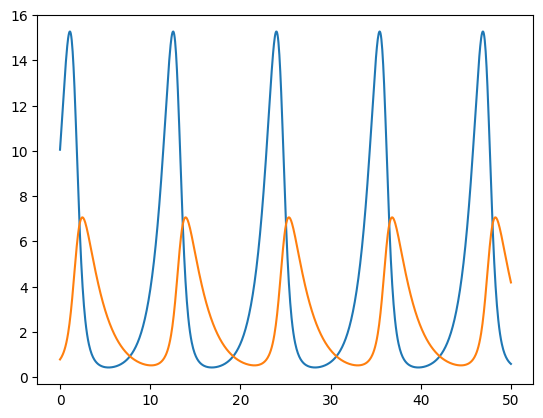

In [32]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
from deepchem.utils.differentiation_utils.optimize.equilibrium import anderson_acc
import torch
import matplotlib.pyplot as plt


def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return torch.tensor([a * y1 - b * y1 * y2, c * y2 * y1 - d * y2])


def loss_function(params, years,fish_pop, bears_pop):

    y0 = torch.tensor([fish_pop[0], bears_pop[0]])

    t = torch.linspace(years[0], years[-1], len(years))

    output = rk4_ivp(lotka_volterra, t, y0, params)

    loss = 0

    for i in range(len(years)):
        data_fish = fish_pop[i]
        model_fish = output[i,0]

        data_bears = bears_pop[i]
        model_bears = output[i,1]

        res = (data_fish - model_fish)**2 + (data_bears - model_bears)**2

        loss += res

    return(loss)

import scipy.optimize

params0 = torch.tensor([1.1, .4, .1, .4])
minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))
#minimum = anderson_acc(loss_function, params0, (years,fish_pop, bears_pop))


alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = torch.tensor([alpha_fit, beta_fit, delta_fit, gamma_fit])

#params = torch.tensor([1.1, 0.4, 0.1, 0.4])

y0 = torch.tensor([fish_pop[0], bears_pop[0]])


t = torch.linspace(years[0], years[-1], 1000)

output = rk4_ivp(lotka_volterra, t, y0, params)

plt.plot(t, output)
plt.show()

In [33]:
from deepchem.utils.differentiation_utils.optimize.equilibrium import anderson_acc

import torch
def fcn(x):
    return 2 * x + 1
x0 = torch.tensor([-2.0], requires_grad=True)
x = anderson_acc(fcn, x0, [])
x, fcn(x)

/home/gigavolt/deepchem/deepchem/utils/differentiation_utils/optimize/equilibrium.py:159: ConvergenceWarning: The rootfinder does not converge after 200 iterations.
  warnings.warn(ConvergenceWarning(msg))


(tensor([-1.0312], grad_fn=<ViewBackward0>),
 tensor([-1.0624], grad_fn=<AddBackward0>))

12
12


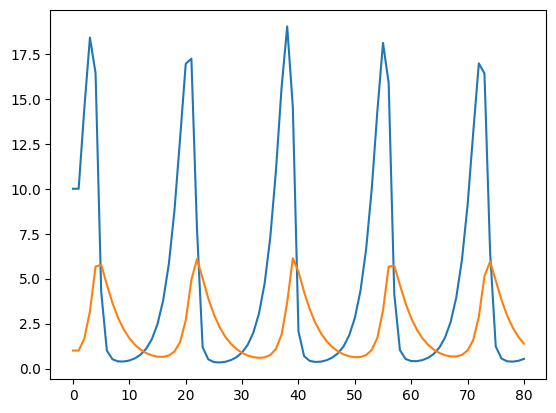

In [10]:
from deepchem.utils.differentiation_utils.integrate.ode import solver_euler_1_new3

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]

#sol = solver_euler_1_new(lotka_volterra, 0.0, [10, 1], 0.1, 50)
import matplotlib.pyplot as plt
import numpy as np

sol = solver_euler_1_new3(lotka_volterra, [10, 1], np.linspace(0, 50, num=80), args= np.array([1.1, 0.4, 0.1, 0.4]))
plt.plot(sol)
plt.show()

[[10.          1.        ]
 [12.96916017  1.35679623]
 [15.46281082  2.06724019]
 [15.69994486  3.35404861]
 [12.35440985  5.10701978]
 [ 7.42433086  6.48881465]
 [ 3.85152021  6.8911625 ]
 [ 1.99832072  6.56493384]
 [ 1.12655962  5.9300191 ]
 [ 0.71003872  5.22388179]
 [ 0.50144061  4.54591426]
 [ 0.39362663  3.93137943]
 [ 0.33960443  3.3890584 ]
 [ 0.31826681  2.9171941 ]
 [ 0.32042919  2.51009236]
 [ 0.34311846  2.16090402]
 [ 0.38731536  1.86281685]
 [ 0.45729545  1.60956322]
 [ 0.56086964  1.39562799]
 [ 0.71030194  1.21633074]
 [ 0.92389825  1.06787097]
 [ 1.22836075  0.94739369]
 [ 1.66201122  0.85313391]
 [ 2.27882909  0.7847314 ]
 [ 3.15268523  0.74389472]
 [ 4.37954721  0.73580667]
 [ 6.07118263  0.7721745 ]
 [ 8.32307074  0.87805658]
 [11.11389286  1.10721222]
 [14.05186148  1.57311739]
 [15.93483874  2.48069787]
 [14.82622948  3.99860693]
 [10.46074289  5.73110812]
 [ 5.83108739  6.7568968 ]
 [ 2.9818525   6.82688472]
 [ 1.5870584   6.34255878]
 [ 0.93218722  5.66206566]
 

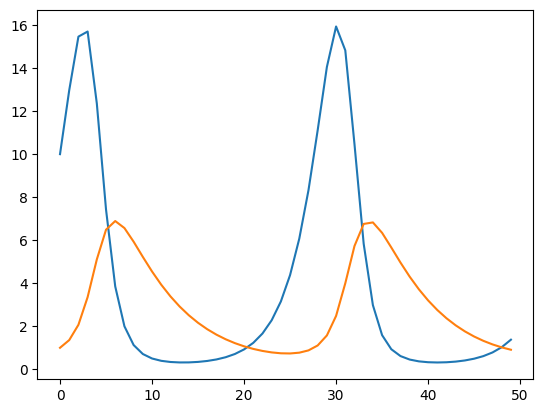

In [26]:
def lotka_volterra(y, x):
    y1, y2 = y

    return [np.array(1.1 * y1 - 0.4 * y1 * y2), np.array(0.1 * y2 * y1 - 0.4 * y2)]

#sol = solver_euler_1_new(lotka_volterra, 0.0, [10, 1], 0.1, 50)
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

sol = odeint(lotka_volterra, [10, 1], np.linspace(0, 20, num=50))
print(sol)
plt.plot(sol)
plt.show()
#plt.plot(sol[0], sol[1][1], color='r')

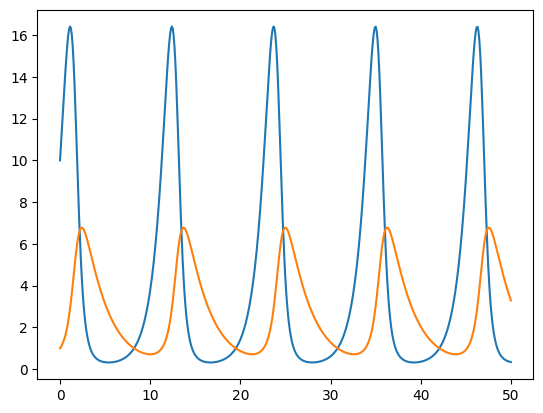

## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Differentiation Infrastructure in Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/ODE_Solving.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!